# Melanoma Case Study

**Problem statement:**
 To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ea10b529-56e6-6b8b-ee95-31b869a38f90)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip "/content/gdrive/MyDrive/Melanoma Case study/CNN_assignment.zip" -d /content/

Archive:  /content/gdrive/MyDrive/Melanoma Case study/CNN_assignment.zip
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: /content/Skin cancer ISIC The In

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [7]:
for dirpath, dirnames, filenames in os.walk("Skin cancer ISIC The International Skin Imaging Collaboration"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Skin cancer ISIC The International Skin Imaging Collaboration'.
There are 9 directories and 0 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test'.
There are 0 directories and 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis'.
There are 0 directories and 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma'.
There are 0 directories and 3 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion'.
There are 0 directories and 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis'.
There are 0 directories and 3 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis'.
There are 0 directories and 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma'.


### Load using keras.preprocessing

Loading these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Train dataset
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Validation dataset
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
## Test Dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_test,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 118 files belonging to 9 classes.


In [12]:
# Listing out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

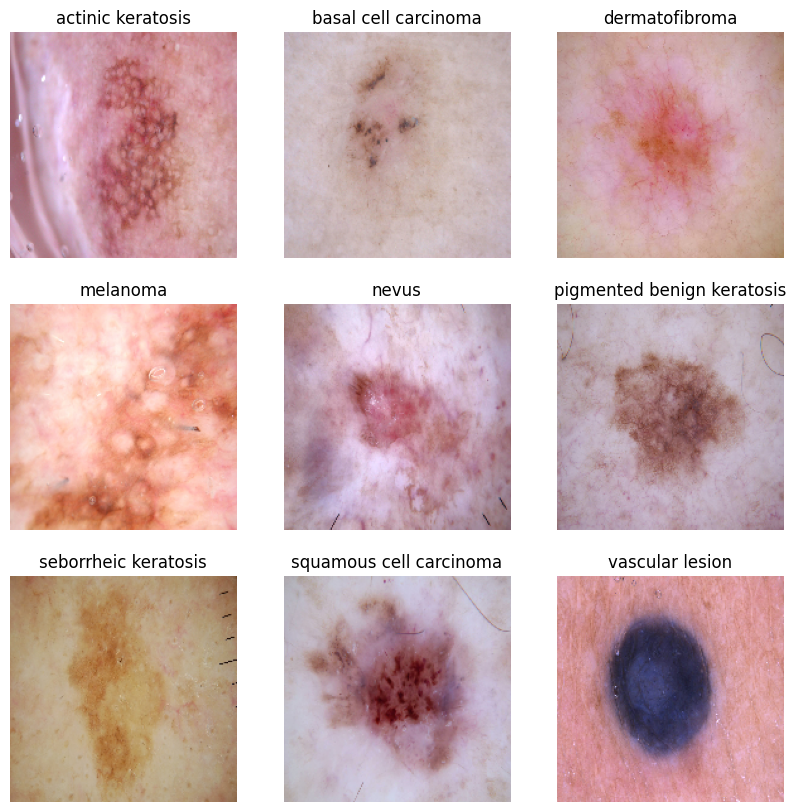

In [13]:
import matplotlib.pyplot as plt
import random

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,random.sample(os.listdir(str(data_dir_train)+'/'+c), 1)))

#Visualize image
plt.figure(figsize=(10,10))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(tf.keras.utils.load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the model
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset. Using ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, we have used the rescaling layer to standardize values to be in the `[0, 1]`

In [15]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convolution layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Second Convolution layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Third Convolution Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Fourth Convolution Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Fifth Convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Sixth Convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Seventh Convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Eight Convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(16,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the model


In [16]:
#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 178, 178, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 16)      2320      
                                                                 
 batch_normalization_1 (Bat  (None, 176, 176, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 16)        0

### Train the model

In [18]:
# Training for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  steps_per_epoch=len(train_ds),
  validation_data=val_ds,
  validation_steps=len(val_ds),
  epochs=epochs,
)

Epoch 1/20
56/56 [==============================] - 35s 168ms/step - loss: 2.1857 - accuracy: 0.2422 - val_loss: 2.3078 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0422 - accuracy: 0.3566 - val_loss: 2.5850 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 5s 88ms/step - loss: 1.8717 - accuracy: 0.3839 - val_loss: 3.6655 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 5s 88ms/step - loss: 1.7361 - accuracy: 0.4425 - val_loss: 2.8224 - val_accuracy: 0.2260
Epoch 5/20
56/56 [==============================] - 5s 89ms/step - loss: 1.5916 - accuracy: 0.4849 - val_loss: 4.3452 - val_accuracy: 0.2215
Epoch 6/20
56/56 [==============================] - 5s 89ms/step - loss: 1.4909 - accuracy: 0.5006 - val_loss: 2.3200 - val_accuracy: 0.3736
Epoch 7/20
56/56 [==============================] - 5s 88ms/step - loss: 1.4816 - accuracy: 0.5151 - val_loss: 2.0613 - val_accuracy: 0.3937
Epoch 8/20


### Visualizing training results

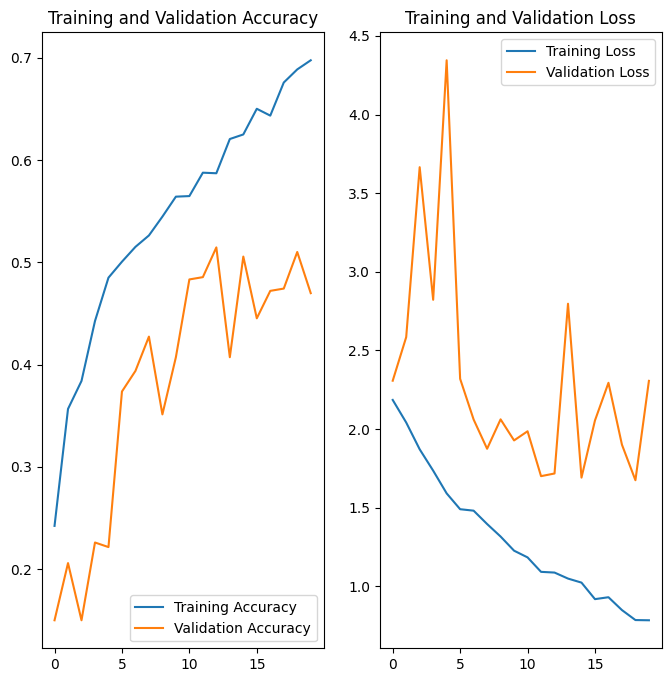

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Analysis: The model is slightly overfitting. The training accuracy is in 60s, while the validation accuracy is stuck in 50. If the training would continue the model will overfit even more.

### Utilising Image Augmentation to reduce overfitting

In [20]:
## Utilising Tensorflow's inbuild layer for performing data augmentation. This layer can be included as part of the model, and runs on only training data
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])

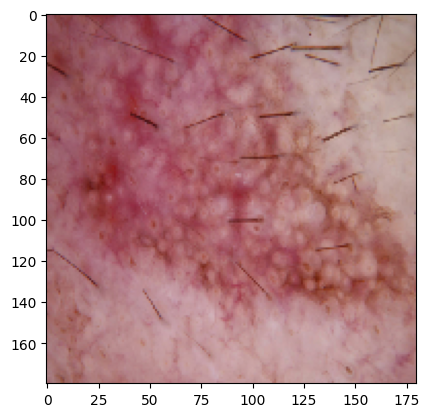

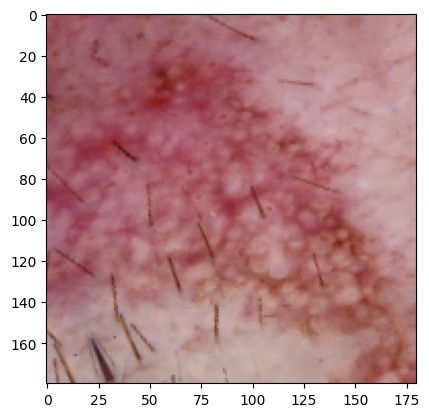

In [21]:
im_path = "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg"
plt.imshow(tf.keras.utils.load_img(im_path,target_size=(180,180)))
plt.show()
plt.imshow(data_augmentation(tf.keras.utils.load_img(im_path,target_size=(180,180)))/255.)
plt.show()


### Creating the model with image agumentation


In [22]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

## Data augmentation and rescaling
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convolution layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Second Convolution layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Third Convolution Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Fourth Convolution Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Fifth Convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Sixth Convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Seventh Convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Eight Convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(16,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))


### Compiling the model

In [23]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

### Training the model

In [24]:
# Training for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  steps_per_epoch=len(train_ds),
  validation_data=val_ds,
  validation_steps=len(val_ds),
  epochs=epochs,
)

Epoch 1/20
56/56 [==============================] - 14s 100ms/step - loss: 2.1292 - accuracy: 0.2031 - val_loss: 2.2079 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 94ms/step - loss: 1.9223 - accuracy: 0.3315 - val_loss: 2.5964 - val_accuracy: 0.1790
Epoch 3/20
56/56 [==============================] - 5s 95ms/step - loss: 1.8362 - accuracy: 0.3633 - val_loss: 2.1783 - val_accuracy: 0.1409
Epoch 4/20
56/56 [==============================] - 5s 94ms/step - loss: 1.7677 - accuracy: 0.3834 - val_loss: 2.0939 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 5s 97ms/step - loss: 1.6852 - accuracy: 0.4113 - val_loss: 2.3999 - val_accuracy: 0.1298
Epoch 6/20
56/56 [==============================] - 5s 96ms/step - loss: 1.5921 - accuracy: 0.4448 - val_loss: 2.1684 - val_accuracy: 0.1879
Epoch 7/20
56/56 [==============================] - 5s 93ms/step - loss: 1.6065 - accuracy: 0.4224 - val_loss: 2.1735 - val_accuracy: 0.1700
Epoch 8/20


### Visualizing the results

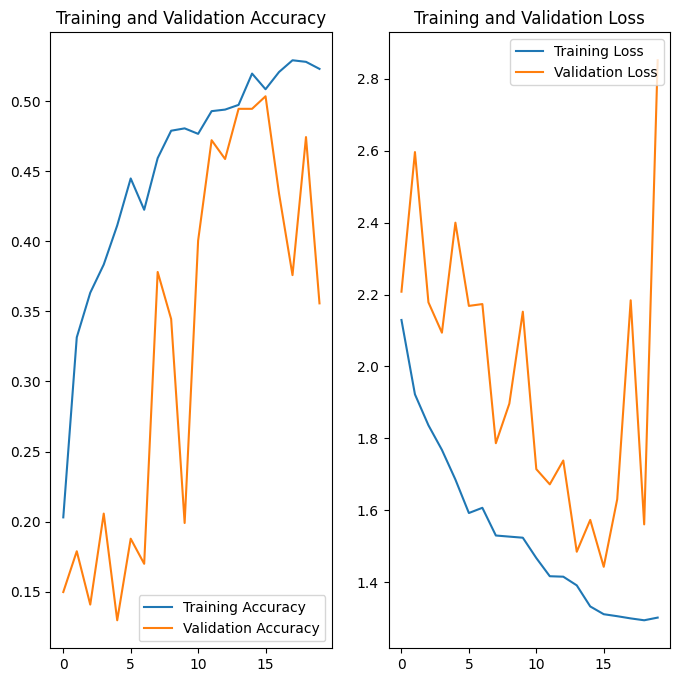

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The model's overfitting has decreased considerably, and now the validation accuracy is seen to be following the training accuracy closely. The validation accuracy and validation loss, though exhibit significant fluctuation.

#### Checking for presence of Class Imbalance

In [26]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,dermatofibroma,95
2,vascular lesion,139
3,pigmented benign keratosis,462
4,seborrheic keratosis,77
5,squamous cell carcinoma,181
6,nevus,357
7,basal cell carcinoma,376
8,melanoma,438


<Axes: xlabel='No. of Image', ylabel='Class'>

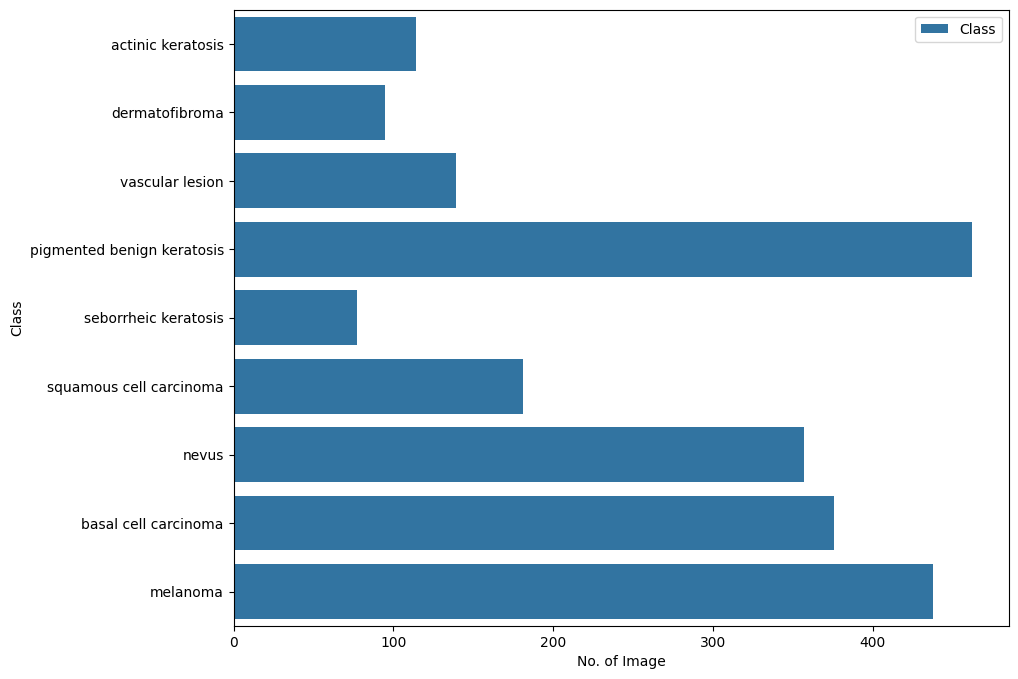

In [27]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

#### The above graph makes it clear that there is significant variation in the number of images in each class. Pigmented benign keratosis is the biggest class with 462 images, and seborrheic keratosis is the smallest class with only 77 images.


#### To Rectify the class imbalance installing the python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
data_dir_train = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/')

In [34]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train)+'/'+'Train'+'/'+i, str(data_dir_train)+'/'+'augmented'+'/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A3B050707F0>: 100%|██████████| 500/500 [00:16<00:00, 30.44 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A3B86C5BE50>: 100%|██████████| 500/500 [00:17<00:00, 29.28 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A3A092AA8C0>: 100%|██████████| 500/500 [00:17<00:00, 29.04 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7A3AFFDDAF80>: 100%|██████████| 500/500 [01:31<00:00,  5.46 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A3B84FCC970>: 100%|██████████| 500/500 [01:27<00:00,  5.74 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/pigmented benign keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A3B84F41A80>: 100%|██████████| 500/500 [00:16<00:00, 29.47 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A3AFFDD9480>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A3A09485D80>: 100%|██████████| 500/500 [00:15<00:00, 31.47 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented/vascular lesion.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A3AFFC10520>: 100%|██████████| 500/500 [00:17<00:00, 28.15 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
data_dir_train = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented')

In [36]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
for dirpath, dirnames, filenames in os.walk("Skin cancer ISIC The International Skin Imaging Collaboration/augmented"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 9 directories and 0 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented'.
There are 0 directories and 500 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented/actinic keratosis'.
There are 0 directories and 500 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented/dermatofibroma'.
There are 0 directories and 500 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented/vascular lesion'.
There are 0 directories and 500 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented/pigmented benign keratosis'.
There are 0 directories and 500 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented/seborrheic keratosis'.
There are 0 directories and 500 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/augmented/squamous cell carcinoma'.
There are 0 directories and 500 images in 'Skin cancer ISIC Th

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Training the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### ReCreating a training dataset

In [39]:
data_dir_train = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented')

In [40]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### ReCreating a validation dataset

In [41]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [42]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### ReCreating model

In [43]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convolution layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Second Convolution layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Third Convolution Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Fourth Convolution Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Fifth Convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Sixth Convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Seventh Convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Eight Convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Maxpool Layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(16,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))


#### Compiling model

In [44]:
#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Training model

In [45]:
# Training for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  steps_per_epoch=len(train_ds),
  validation_data=val_ds,
  validation_steps=len(val_ds),
  epochs=epochs,
)

Epoch 1/20
113/113 [==============================] - 28s 168ms/step - loss: 2.2202 - accuracy: 0.1119 - val_loss: 2.2060 - val_accuracy: 0.1100
Epoch 2/20
113/113 [==============================] - 18s 157ms/step - loss: 2.1942 - accuracy: 0.1239 - val_loss: 2.3591 - val_accuracy: 0.1244
Epoch 3/20
113/113 [==============================] - 16s 133ms/step - loss: 2.1991 - accuracy: 0.1083 - val_loss: 2.1978 - val_accuracy: 0.1067
Epoch 4/20
113/113 [==============================] - 17s 142ms/step - loss: 2.2000 - accuracy: 0.1106 - val_loss: 2.2586 - val_accuracy: 0.0900
Epoch 5/20
113/113 [==============================] - 18s 150ms/step - loss: 2.1974 - accuracy: 0.1081 - val_loss: 2.2139 - val_accuracy: 0.1044
Epoch 6/20
113/113 [==============================] - 17s 133ms/step - loss: 2.1975 - accuracy: 0.1081 - val_loss: 2.2194 - val_accuracy: 0.1033
Epoch 7/20
113/113 [==============================] - 17s 139ms/step - loss: 2.2224 - accuracy: 0.1075 - val_loss: 2.1976 - val_ac

#### Visualizing the model results

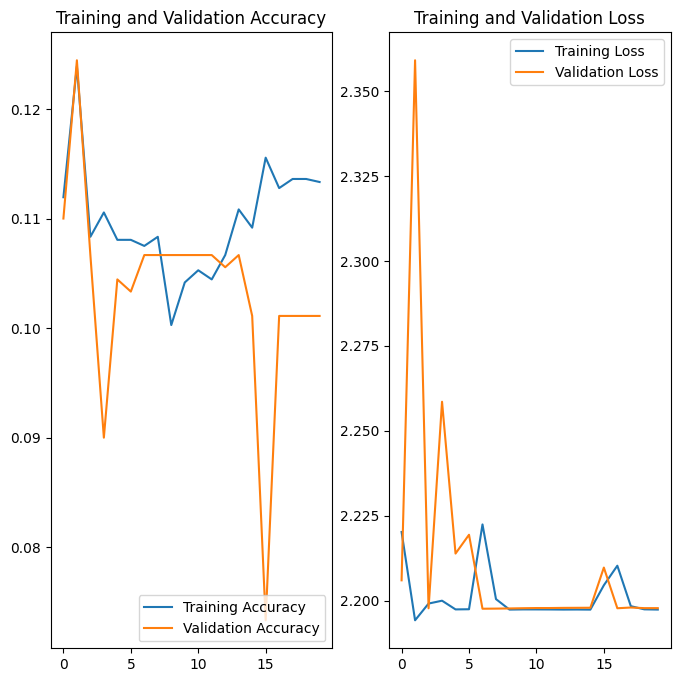

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analysis of the results:

Class rebalancing helped reduce the overfitting, but it also reduced the model accuracy both on training and validation sets. This suggests a bigger model may be used to further improve accuracy.
Regularising with the help of droupout layers and batch normalisation helped improve the model performance.

